# Aula 10 - Clusterização

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução a Clusterização
- 2) K-Means
- 3) Redução de Dimensionalidade
- 4) DBScan
- 5) Exercícios

<img src="https://miro.medium.com/max/724/0*ipBIcsy9jjvqEpbK.png" width=800>

##   

## Introdução a Clusterização

Partindo agora para trabalhar com modelo **não supervisionados** de Machine Learning, um dos problemas que podemos resolver com esse tipo de abordagem é a **Clusterização**.<br><br>

Este tipo de problema consiste em __agrupar__ itens semelhantes, isto é, criar __grupos__ (ou __clusters__) dos dados que são parecidos entre si.

> O objetivo central é **dividir os dados em grupos distintos**, tais que **membros de cada grupo sejam similares entre si** e **diferentes a membros nos outros grupos**
<br><br>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjleb9bnO4ivvONN70Fc5k4Xs48cab_4i0phSc_l0qvVndo8VFs0B5d0jCEWeNOk0pG3Y&usqp=CAU" width=600><br><br>

Existem diversos contextos onde podemos abordar problemas utilizando de clusterização:

- Identificação de tipos de clientes parecidos, para o direcionamento de marketing;
- Agrupamento de cidades próximas para melhor logística de entrega de produtos;
- Identificação de padrões climáticos;
- Identificação de genes relacionados à determinada doença;
- Identificação de documentos semelhantes em processos legais;
- Qualquer outro problema em que deseje **agrupar dados similares** ou ainda **encontrar alguma estrutura nos seus dados.

Dado esse contexto todo, vamos partir para conhecer o principal algoritmo de clusterização: **K-Means**

##   

## K-Means

O K-Means é um algoritmo de clusterização amplamente utilizado na prática, onde temos uma **fácil interpretabilidade** e **boa eficiência computacional**.

Como funciona o K-Means na prática? Muito simples! Praticamente o que precisamos fazer é:
<br>
- **Definir K pontos** que serão utilizados como **centróides iniciais** para o modelo;
- **Agrupe K grupos** associando todos os pontos aos **centróides mais próximos**;
- Definido os K grupos, **recalcula-se a posição dos centróides** dos K grupos;
- **Repita o seguinte processo**: reagrupe os pontos em K grupos em relação aos centróides mais próximos e recalcula o valor do centróide (**repita até a posição dos clusters não se alterar mais**).

<img src="https://i.stack.imgur.com/ibYKU.png" width=1000><br><br>

**IMPORTANTE:** O Algoritmo é muito sensível a posição inicial dos centróides!!!<br><br>
Veremos isso já colocando na prática a aplicação do K-Means:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

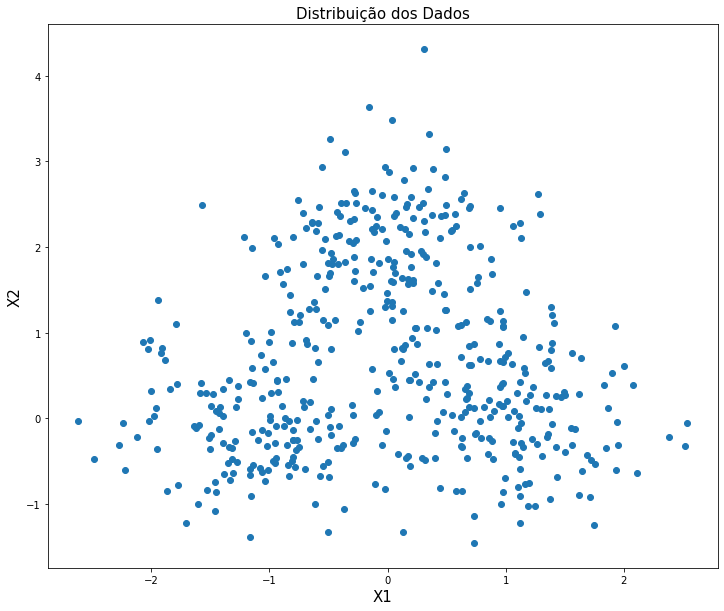

In [2]:
import sklearn.datasets as skdata

centers = [(0,2), (-1, 0), (1, 0)]
X, y = skdata.make_blobs(n_samples=500, n_features=2, cluster_std=0.6, centers=centers, 
                         shuffle=False, random_state=42)

plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.title('Distribuição dos Dados', fontsize=15)
plt.show()

In [3]:
# Importando a biblioteca do K-Means
from sklearn.cluster import KMeans

In [4]:
#Instanciando o modelo
model = KMeans(n_clusters=5, max_iter=1, n_init = 1, random_state = 1)

print("parâmetros:", model.get_params())

parâmetros: {'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 1, 'n_clusters': 5, 'n_init': 1, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': 1, 'tol': 0.0001, 'verbose': 0}


In [5]:
model.fit(X)

KMeans(max_iter=1, n_clusters=5, n_init=1, random_state=1)

In [6]:
# 5) fazendo previsões

clusters_1 = model.predict(X)

In [7]:
model = KMeans(n_clusters=5, max_iter=1, n_init = 1, random_state = 42)
model.fit(X)
clusters_2 = model.predict(X)

model = KMeans(n_clusters=5, max_iter=1, n_init = 1, random_state = 69)
model.fit(X)
clusters_3 = model.predict(X)

<Figure size 864x864 with 0 Axes>

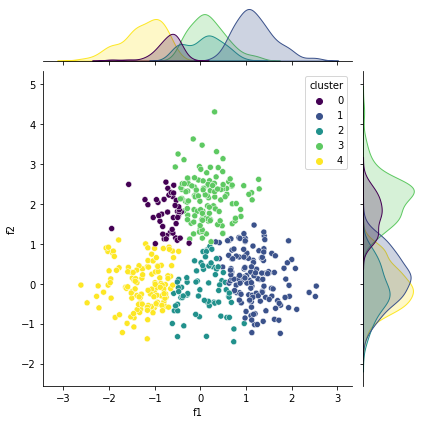

In [8]:
#aqui eu crio um dataframe com as coordenadas dos pontos ("x" e "y"), e com as labels dos clusters
clustered_data_rs1 = pd.concat([pd.DataFrame(X), pd.Series(clusters_1)], axis=1)
clustered_data_rs2 = pd.concat([pd.DataFrame(X), pd.Series(clusters_2)], axis=1)
clustered_data_rs3 = pd.concat([pd.DataFrame(X), pd.Series(clusters_3)], axis=1)


#aqui eu renomeio as colunas do dataframe
clustered_data_rs1.columns = ['f1','f2','cluster']
clustered_data_rs2.columns = ['f1','f2','cluster']
clustered_data_rs3.columns = ['f1','f2','cluster']


# Gráfico 1
plt.figure(figsize=(12,12))
sns.jointplot(data = clustered_data_rs1, x="f1", y="f2", hue="cluster", palette="viridis")
plt.show()

<Figure size 864x864 with 0 Axes>

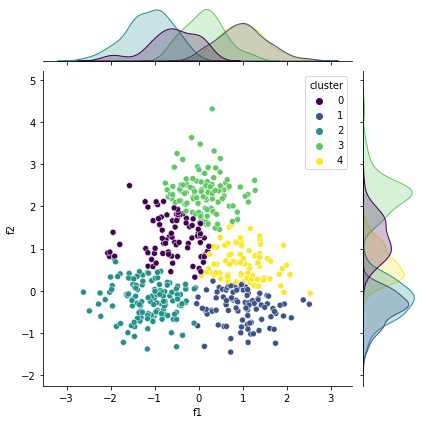

In [9]:
# Gráfico 2
plt.figure(figsize=(12,12))
sns.jointplot(data = clustered_data_rs2, x="f1", y="f2", hue="cluster", palette="viridis")
plt.show()

<Figure size 864x864 with 0 Axes>

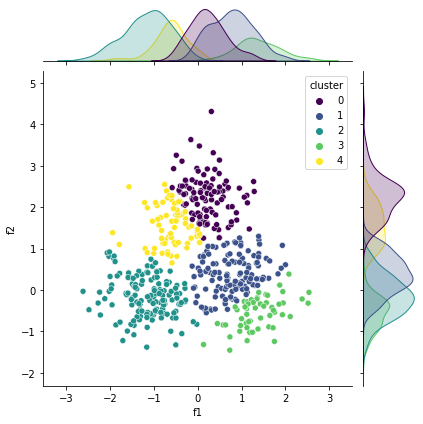

In [10]:
# Gráfico 3
plt.figure(figsize=(12,12))
sns.jointplot(data = clustered_data_rs3, x="f1", y="f2", hue="cluster", palette="viridis")
plt.show()

##   

## Limitações do K-Means

Como outros modelos, o K-Means têm também algumas limitações:

#### Podemos ter problemas para classificar se os clusters forem de tamanhos diferentes!:

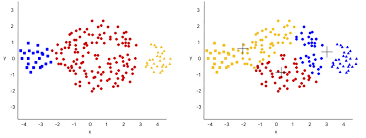<br><br>

#### Podemos ter problemas para classificar se os clusters forem de densidades diferentes!:

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXLM-6eM7Fast5ZkMihXCOaRXpbjngSFI-OA&usqp=CAU" width=800><br><br>

#### Podemos ter problemas para classificar se os clusters forem de formatos diferentes (ou seja não globulares):

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6C_3hKKivY93zaxpIJsHcKiDj6Bu946B-0kbtd17tuofz_Dtm4Yw8y-MBOsWbosGf0nw&usqp=CAU" width=800><br><br>

##  

## Escolhendo o Valor de K

Para podermos definir o melhor valor de K para a nossa clsuterização, vamos utilizar o **Elbow Method**  ou também conhecido como **Método do Cotovelo**, que consiste em rodar o k-means várias vezes, para diferentes valores de k, e depois plotar um gráfico com a **inércia** de cada uma das rodadas. 

A inércia também é chamada de **WCSS** (Within-Cluster-Sum-of-Squares), isto é, "soma de quadrados intra-cluster", que é calculada como a soma das distâncias (ao quadrado) entre os pontos e os centróides dos clusters.

Ou seja quanto menor o WCSS, mais eficiente foi a clusterização, mas vamos pensar no seguinte caso: conforme o número de clusters (k) aumenta, o WCSS diminui, sendo mínimo quando cada ponto é seu próprio cluster isolado, mas nesse caso não temos uma clusterização!.

<img src="https://www.researchgate.net/profile/Vinicius-Rofatto/publication/341622556/figure/fig5/AS:895083989704708@1590416061547/Within-Cluster-Sum-of-Squares-WCSS-for-Para-State.png" width=500><br><br>

Assim, o que queremos não é encontrar um k que minimize o WCSS, mas sim um k a partir do qual o WCSS **para de decrescer tão rapidamente!**

Quando encontramos este k, encontramos o número ideal de clusters!

Ao plotarmos o WCSS (inércia) em função de k, o que buscaremos será então o valor de k onde **o gráfico deixa de ser tão inclinado**. Esses pontos são visualizados como "quinas", ou **cotovelos** no gráfico -- e daí vem o nome do método!

Vamos aprender a definir o melhor número de clusters K, com um exemplo prático!

##  

## Exercício Prático

Usando os [Dados sobre faculdades americanas](https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data?select=College.csv), vamso fazer a nossa clusterização com K-Means e definir o melhor valor de K.

Os dados são referentes ao ano de 1995, e contêm as seguintes variáveis:

- **Apps:** número de aplicações (inscrições para processo seletivo) recebidas

- **Accept:** número de aplicações aceitas

- **Enroll:** número de novos alunos admitidos naquele ano

- **Top10perc:** porcentagem de novos alunos que vieram das top 10% melhores escolas de ensino médio

- **Top25perc:** porcentagem de novos alunos que vieram das top 25% melhores escolas de ensino médio

- **F.Undergrad:** número de alunos de graduação que estudam em período integral

- **P.Undergrad:** número de alunos de graduação que estudam meio período

- **Outstate:** valor da anual da faculdade para alunos fora do estado

- **Room.Board:** custos anuais de aluguel

- **Books:** gasto estimado com livros

- **Personal:** gastos pessoais de custo de vida

- **PhD:** porcentagem do corpo docente com doutorado

- **Terminal:** porcentagem do corpo docente com o maior grau de escolaridade possível

- **S.F.Ratio:** razão de número de estudantes/corpo docente

- **perc.alumni:** porcentagem de ex-alunos que doaram dinheiro para a universidade

- **Expend:** gastos institucionais com os estudantes

- **Grad.Rate:** taxa de graduação

In [11]:
df = pd.read_csv('../datasets/college.csv')

In [12]:
df.head()

Name  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [14]:
#Não iremos precisar do nome da Faculdade, então iremos dropar a coluna:
df.drop(['Name'], axis = 1, inplace = True)

In [17]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [16]:
df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

As *features* **PhD** e a **Grad.Rate** são procentagens que variam entre 0 e 100% apenas. Temos algumas incosistências de dados, mas vamos corrigir isso:

In [18]:
df.loc[df["PhD"] == 103, "PhD"] = 100

In [19]:
df.loc[df['Grad.Rate'] == 118, 'Grad.Rate'] = 18

In [20]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.656371   79.702703   14.089704    22.743887   
std     677.071454   16.321324   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  100.000000  100.000000   39.800000    64.000000   

             Expend   Grad.Rate  
count    777.000000  777.000000  
mean    9660.171171   65.334620  
std     5221.768440   17.158186  
min     3186.000000   10.000000  
25%     6751.000000   53.000000  
50%     8377.000000   65.000000  
75%    10830.000000   78.000000  
max    56233.000000  100.000000

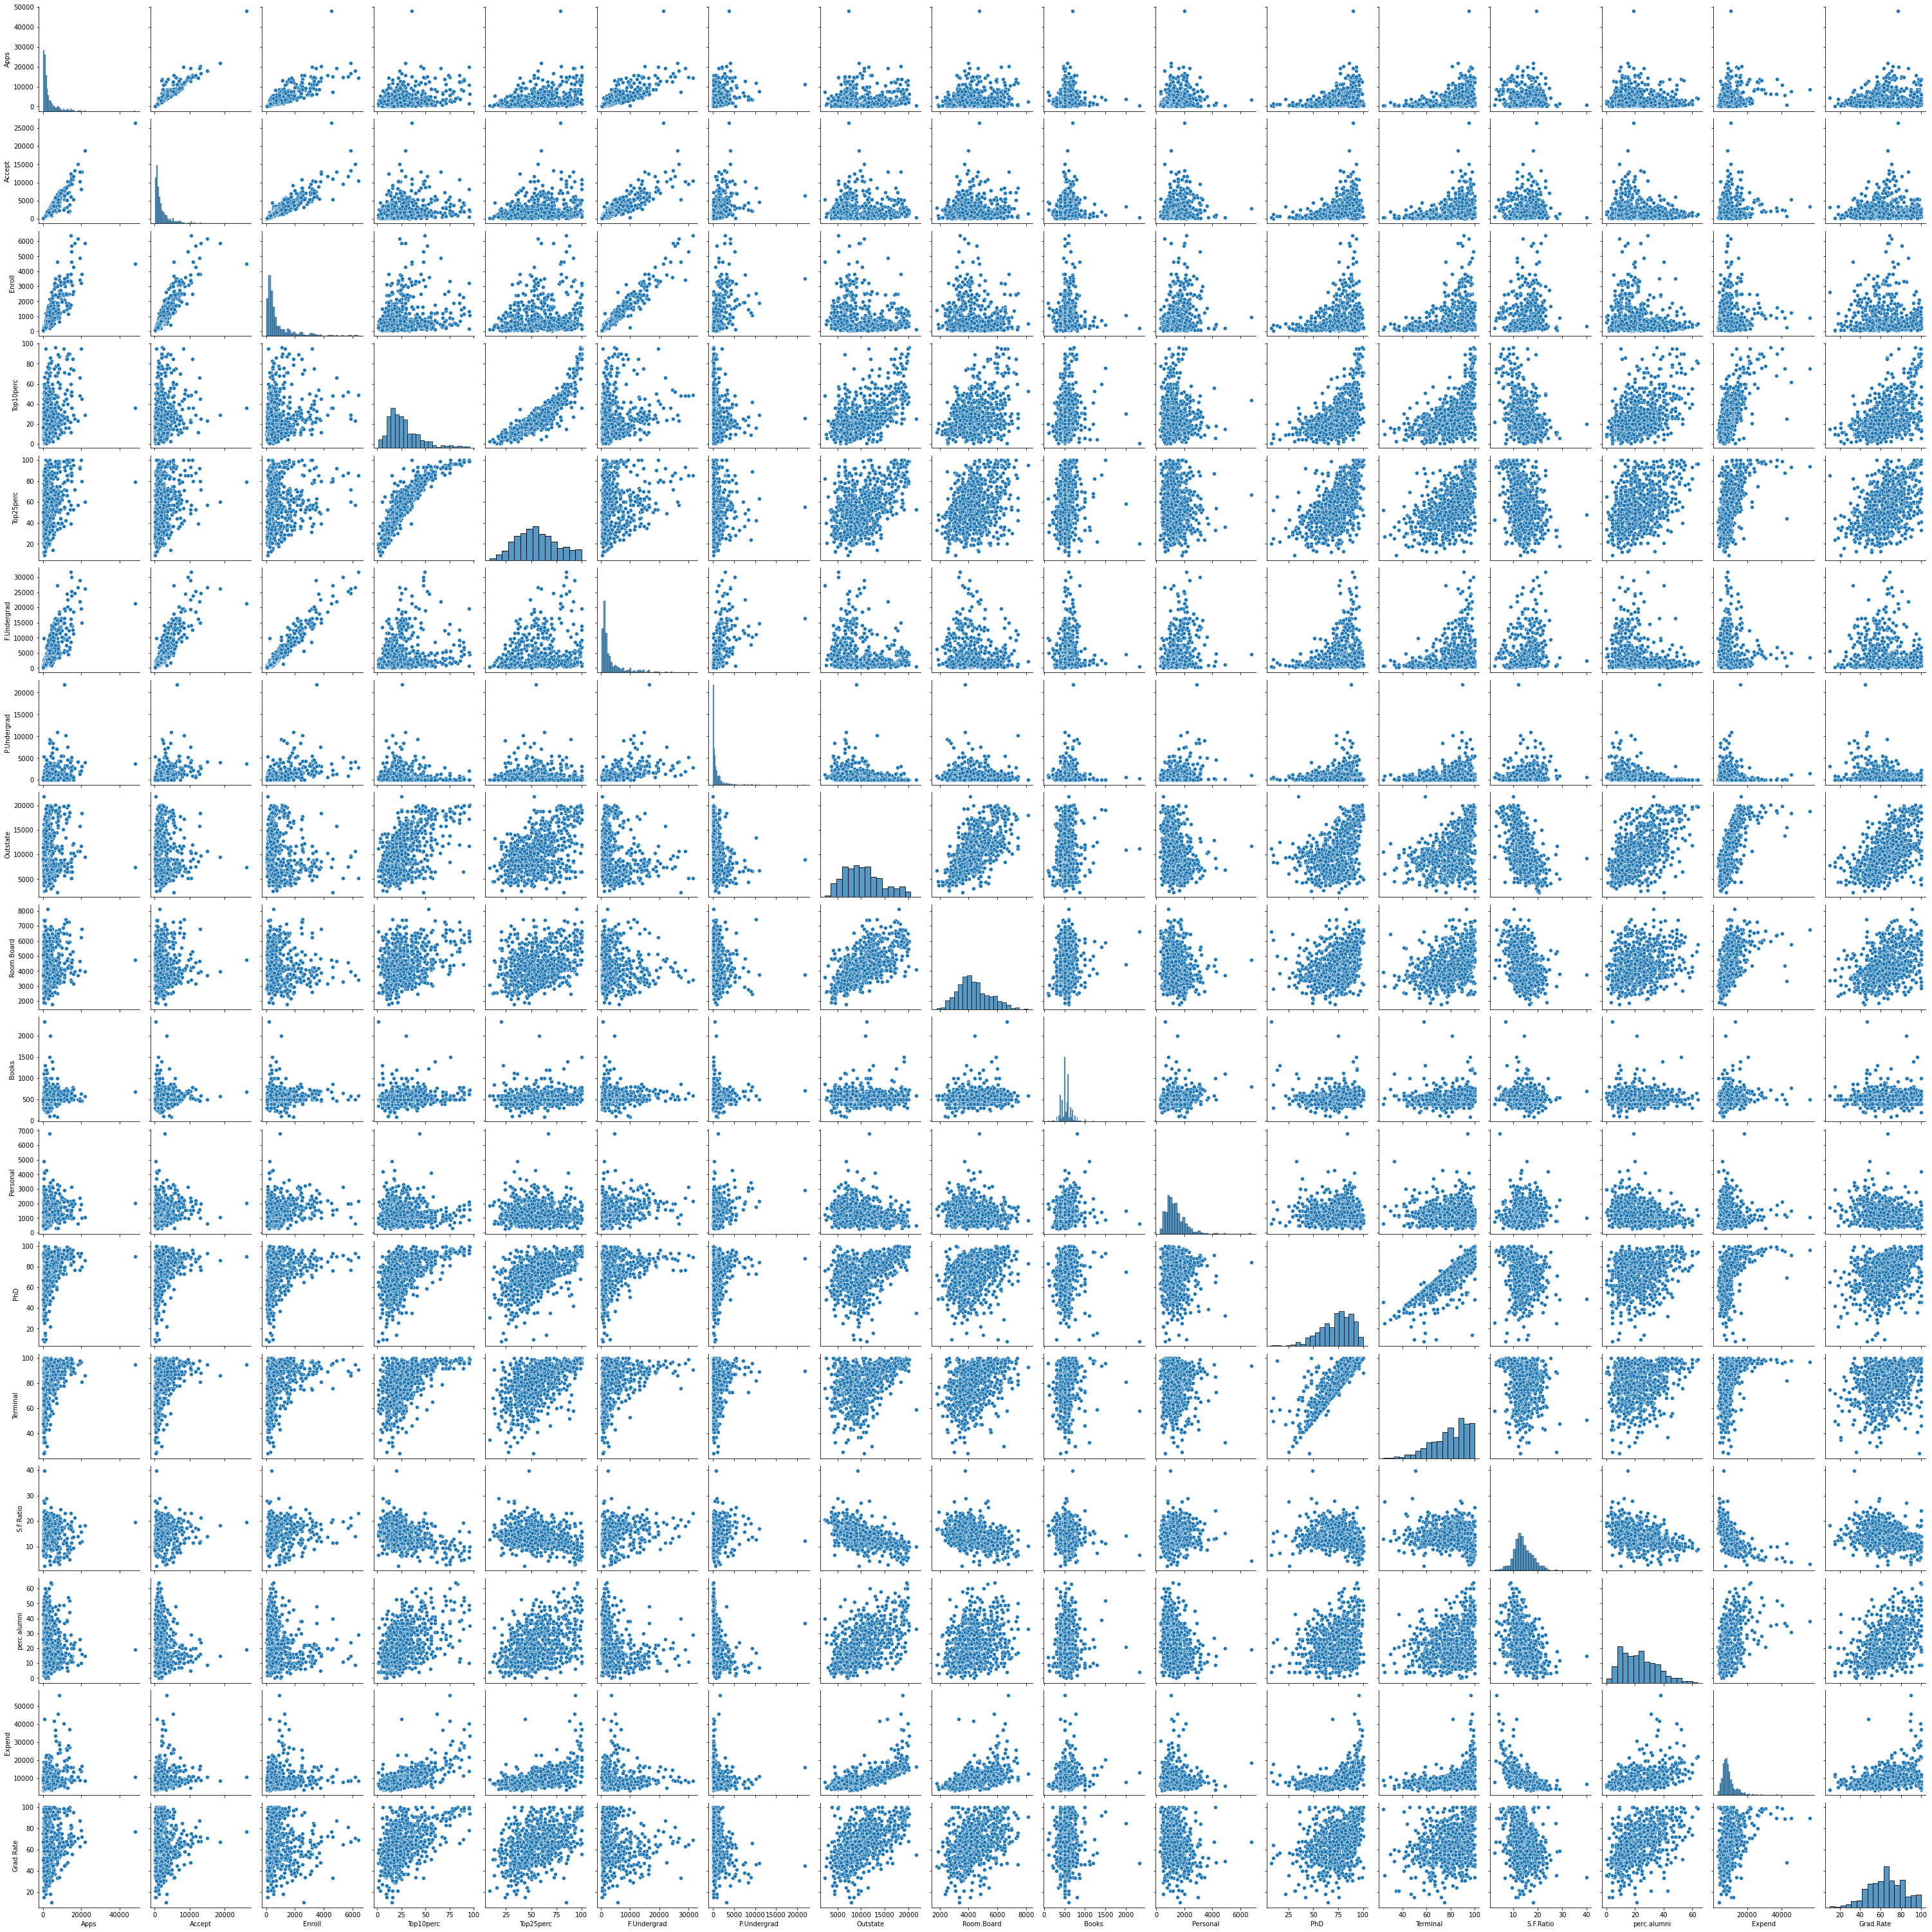

In [21]:
sns.pairplot(df)

Vamos começar com o K-Means!<br><br>
Vamos primeiro criar uma função que calcule a inércia para vários números de clusters e salva em uma lista:

In [22]:
from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    
    for n in range(2, 21):
        model = KMeans(n_clusters = n, random_state = 42)
        model.fit(X=data)
        wcss.append(model.inertia_)
        
    return wcss  

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
std = StandardScaler()

In [25]:
X = std.fit_transform(df)

Calculando as inércias:

In [26]:
wcss = calculate_wcss(X)

In [27]:
wcss

[10464.483528528794,
 8248.981594145123,
 7435.592492212908,
 6841.08042865583,
 6510.621747102927,
 6248.096335669787,
 5988.210655678335,
 5777.131848364284,
 5546.919000715471,
 5431.710456709682,
 5238.362360883718,
 5108.26370548007,
 4965.528797957653,
 4893.423702895421,
 4763.505501771686,
 4690.310498712049,
 4623.204706176407,
 4535.080371246599,
 4447.773473924646]

Criando o Gráfico de Cotovelo:

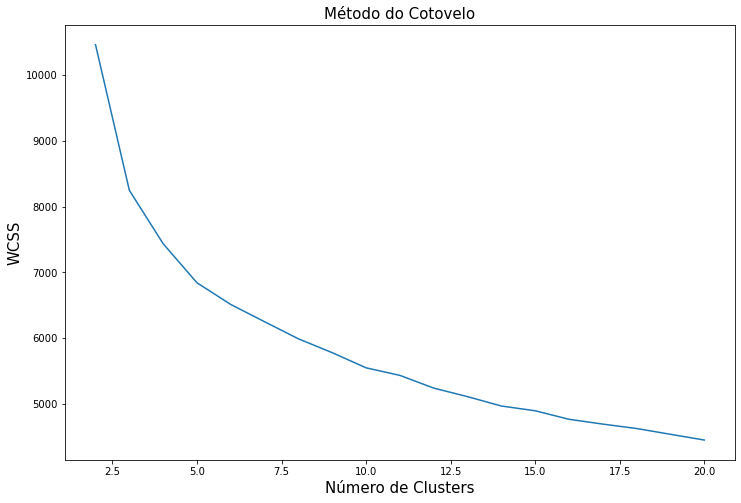

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(2, 21), wcss)
plt.title('Método do Cotovelo', fontsize = 15)
plt.xlabel('Número de Clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

**DICA ESPERTA:** uma maneira matemática de descobrirmos o número ideal de clusters é ligarmos o ponto inicial e final do gráfico de cotovelo por uma reta!<br><br>
Dessa forma, o valor de k onde a distância perpendicular for máxima e onde teremos o nosso número ideal de clusters:

In [29]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [30]:
best_k = optimal_number_of_clusters(wcss)
best_k

5

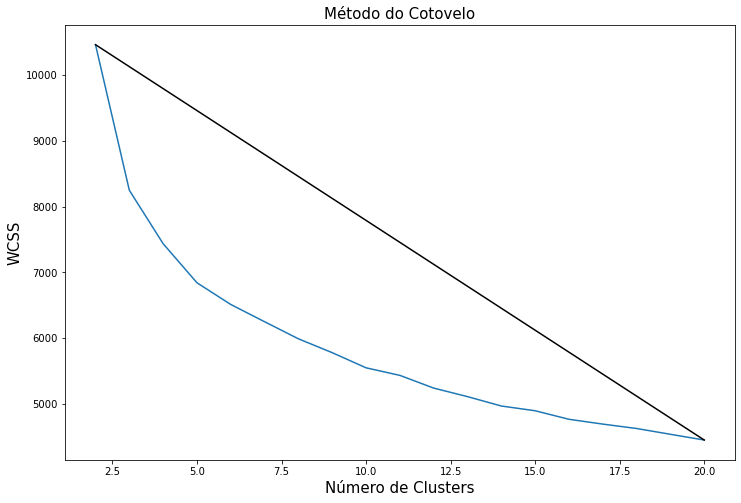

In [31]:
plt.figure(figsize=(12,8))
plt.plot(range(2, 21), wcss)
plt.plot([2,20],[wcss[0],wcss[18]],'k-')
plt.title('Método do Cotovelo', fontsize = 15)
plt.xlabel('Número de Clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

In [32]:
model = KMeans(n_clusters = best_k, random_state = 42)

model.fit(X)

clusters = model.predict(X)

In [33]:
clusters

array([4, 4, 4, 1, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 1, 4, 4, 2, 1, 2,
       4, 3, 0, 4, 0, 3, 4, 0, 4, 0, 4, 4, 0, 4, 1, 1, 0, 2, 0, 0, 4, 4,
       0, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 2, 4, 4, 3, 1, 2, 0, 0, 1, 4,
       4, 4, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 4, 4, 0, 0, 4, 1, 1,
       0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 2, 2, 2, 4, 1, 0, 0, 0,
       0, 4, 2, 4, 1, 0, 4, 0, 2, 4, 0, 0, 1, 1, 0, 2, 4, 0, 4, 0, 0, 0,
       0, 0, 4, 4, 0, 1, 1, 0, 1, 2, 2, 0, 1, 4, 4, 4, 4, 1, 0, 0, 0, 4,
       4, 4, 4, 4, 1, 1, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 1, 0, 1, 0,
       2, 2, 4, 4, 4, 2, 4, 4, 0, 0, 0, 0, 4, 4, 0, 1, 2, 0, 0, 4, 0, 4,
       4, 4, 0, 2, 4, 3, 4, 0, 2, 2, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 2, 1,
       0, 1, 3, 2, 4, 1, 4, 0, 0, 4, 0, 4, 4, 2, 4, 4, 4, 1, 0, 0, 0, 4,
       1, 0, 0, 2, 0, 4, 0, 0, 1, 1, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 4,
       4, 4, 0, 4, 0, 2, 0, 4, 4, 2, 3, 4, 0, 3, 0, 2, 4, 4, 4, 0, 1, 4,
       4, 0, 2, 4, 4, 4, 1, 0, 0, 4, 0, 4, 0, 1, 4,

Agora vamos ver uma técnica para termos uma visualização de como ficou esses agrupamentos feitos pelo _K-Means_. Esse técnica será a __Redução de Dimensionalidade__.

## 

## Redução de Dimensionalidade

Redução de dimensionalidade é uma técnica bastante usada em datasets com o objetivo de aumentarmos a interpretabilidade dos dados minimizando a quantidade de informação perdida no processo.<br><br>

Uma das técnicas utilizadas para esse processo é chamada **Principal Component Analysis (PCA)**.



<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png" width=800>

Focaremos aqui no processo na interpretabilidade do processo pois a base matemática por trás do PCA é bem complexa. Mas esse processo basicamente reduz a dimensionalidade do nosso dataset em um valor n, seja a quantidade de dimensões que quisermos, e o que esse processo retorna para gente são features que representam a variabilidade dos nossos dados.<br><br>
A vantagem desse processo é que ganhamos uma **interpretação gráfica dos dados** minimizando a perda de informação e é um processo interessante para utilizarmos para **testar modelos quando tivermos uma base de dados muito grande**, pois testamos o modelo com poucas features mas sem perder o valor dos dados originais.

Vamos vaplicar o PCA na nossa base de dados para fazermos a interpretação dos dados:

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X)

In [36]:
X_pca

array([[-1.59035898,  0.76091499],
       [-2.19566705, -0.58088503],
       [-1.42954151, -1.09708725],
       ...,
       [-0.73428315, -0.0804637 ],
       [ 7.92424084, -2.04970577],
       [-0.45864135,  0.36537053]])

In [37]:
df_PCA = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])

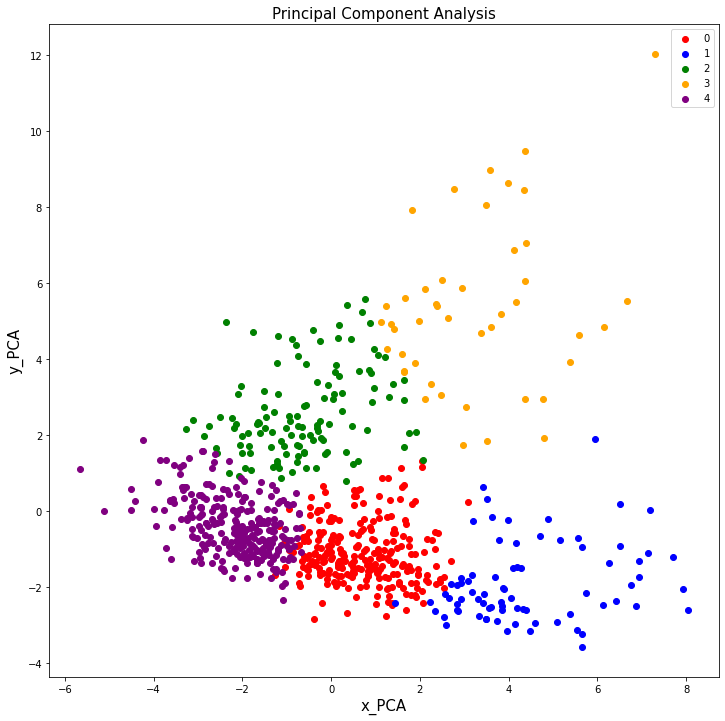

In [38]:
class_labels = np.unique(clusters)

colors = ['red', 'blue', 'green', 'orange', 'purple']
aux = 0
plt.figure(figsize=(12,12))
for c in class_labels:
    ind = np.where(clusters == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

## 

## DBScan

O __Density-based spatial clustering of applications with noise__ ou mais conhecido como __DBScan__ é um algoritmo análogo ao _K-Means_, podendo elencar as principais vantagens e desvantagens do _DBScan_ em relação ao _K-Means_:

##### Vantagens:

- Não precisa especificar um número de clusters;
<br>
- Lida bem com outliers e ruídos nos dados;

##### Desvantagens:

- O _DBScan_ não é tão eficiente para modelar _datasets_ muito esparsos ou _datasets_ grandes.

<img src="https://zhangruochi.com/DBSCAN-Clustering/2020/04/14/3.png" width=600>


O Diferencial de modelagem do _DBScan_ é que passamos dois parâmetros para ele:

- __eps__: Seria o raio de alcance da varredura do algoritmo;

- __min_samples:__ a quantidade mínima de pontos que devem estar dentro do raio para ser considerado.

Vamos ver a implementação do _DBScan_ no mesmo exemplo anterior:

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
db = DBSCAN(eps = 2.5, min_samples = 5).fit(X)

In [41]:
labels_db = db.labels_
labels_db

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1,  0,  0

In [42]:
# Calculando o numero de clusters e numero de pontos considerados ruídos
n_clusters_ = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_ = list(labels_db).count(-1)

In [43]:
print('Estimativa de clusters: %d' % n_clusters_)
print('Estimativa de pontos de ruído: %d' % n_noise_)

Estimativa de clusters: 1
Estimativa de pontos de ruído: 113


In [ ]:
class_labels_db = np.unique(labels_db)
colors = ['red', 'blue']
aux = 0

plt.figure(figsize=(12,12))
for c in class_labels_db:
    ind = np.where(labels_db == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

##  

## Exercícios

**1)** Usando o dataset do *Insurance.csv*, ao inves de definirmos as classes, mas tentar descobrir quais os melhores agrupamentos utilizando o KNN e o DBScan.

In [66]:
dfi = pd.read_csv('../datasets/insurance.csv')

In [67]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [68]:
dfi.head()
#X = std.fit_transform(df)


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [69]:
dfi['flag_sex'] = np.where(dfi['sex'] == 'female', 1, 0)

In [70]:
dfi['is_smoker'] = np.where(dfi['smoker'] == 'yes', 1, 0)

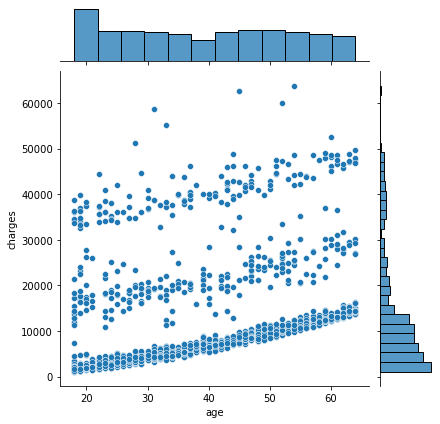

In [71]:
sns.jointplot(data=dfi, x='age', y='charges')

In [72]:
dfi['target'] = np.where(dfi['charges'] < 10000, 0, np.where(dfi['charges'] < 30000, 1, 2))

In [73]:
X = dfi.drop(['charges', 'target', 'sex', 'smoker'], axis = 1)
y = dfi["target"]

In [75]:
X = pd.get_dummies(X, prefix_sep='_', columns=['region'])

In [77]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify = y)


NameError: name 'train_test_split' is not defined

In [65]:
X

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

**2)** Usando o arquivo `wine-clustering.csv`, faça agrupamentos utilizando as técnicas aprendidas na aula de hoje e identifique quais delas se aplica melhor a base de dados

##  